In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/global-aviation-hub-dataset-of-airports-worldwide/airports .csv


In [2]:
# import the dataset
df = pd.read_csv('/kaggle/input/global-aviation-hub-dataset-of-airports-worldwide/airports .csv',index_col='id')

In [3]:
#show the top 5 records
df.head()

,ident,type,name,latitude_deg,longitude_deg,elevation_ft,continent,iso_country,iso_region,municipality,scheduled_service,gps_code,iata_code,local_code,home_link,wikipedia_link,keywords
id,,,,,,,,,,,,,,,,,
6523,00A,heliport,Total RF Heliport,40.070985,-74.933689,11.0,NaN,US,US-PA,Bensalem,no,K00A,NaN,00A,https://www.penndot.pa.gov/TravelInPA/airports...,NaN,NaN
323361,00AA,small_airport,Aero B Ranch Airport,38.704022,-101.473911,3435.0,NaN,US,US-KS,Leoti,no,00AA,NaN,00AA,NaN,NaN,NaN
6524,00AK,small_airport,Lowell Field,59.947733,-151.692524,450.0,NaN,US,US-AK,Anchor Point,no,00AK,NaN,00AK,NaN,NaN,NaN
6525,00AL,small_airport,Epps Airpark,34.864799,-86.770302,820.0,NaN,US,US-AL,Harvest,no,00AL,NaN,00AL,NaN,NaN,NaN
506791,00AN,small_airport,Katmai Lodge Airport,59.093287,-156.456699,80.0,NaN,US,US-AK,King Salmon,no,00AN,NaN,00AN,NaN,NaN,NaN


In [4]:
df.rename(columns={'type':'Airport_type'},inplace=True)

In [5]:
#shape of dataset
df.shape

(76367, 17)

# Data checks to perforn

In [6]:
# Check Missing Values
df.isna().sum()

ident                    0
Airport_type             0
name                     0
latitude_deg             0
longitude_deg            0
elevation_ft         14398
continent            36995
iso_country            259
iso_region               0
municipality          5050
scheduled_service        0
gps_code             35022
iata_code            67478
local_code           43575
home_link            72673
wikipedia_link       65332
keywords             59329
dtype: int64

In [7]:
# check Duplicates

df.duplicated().sum()


0

In [8]:
# check Datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 76367 entries, 6523 to 313629
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ident              76367 non-null  object 
 1   Airport_type       76367 non-null  object 
 2   name               76367 non-null  object 
 3   latitude_deg       76367 non-null  float64
 4   longitude_deg      76367 non-null  float64
 5   elevation_ft       61969 non-null  float64
 6   continent          39372 non-null  object 
 7   iso_country        76108 non-null  object 
 8   iso_region         76367 non-null  object 
 9   municipality       71317 non-null  object 
 10  scheduled_service  76367 non-null  object 
 11  gps_code           41345 non-null  object 
 12  iata_code          8889 non-null   object 
 13  local_code         32792 non-null  object 
 14  home_link          3694 non-null   object 
 15  wikipedia_link     11035 non-null  object 
 16  keywords           1703

In [9]:
# check the number of unique values of each column
df.nunique()

ident                76367
Airport_type             7
name                 72238
latitude_deg         75149
longitude_deg        75424
elevation_ft          6231
continent                6
iso_country            244
iso_region            2891
municipality         34144
scheduled_service        2
gps_code             41345
iata_code             8889
local_code           31317
home_link             3663
wikipedia_link       10958
keywords             16662
dtype: int64

In [10]:
# check statistics of dataset
df.describe(exclude='O')

,latitude_deg,longitude_deg,elevation_ft
count,76367.000000,76367.000000,61969.000000
mean,25.695102,-28.898201,1302.989947
std,26.234692,86.149633,1672.216777
min,-90.000000,-179.876999,-1266.000000
25%,11.990227,-94.065952,207.000000
50%,35.133200,-69.794040,730.000000
75%,42.670806,23.845099,1617.000000
max,82.750000,179.975700,17372.000000


In [11]:
df.describe(include='O')

,ident,Airport_type,name,continent,iso_country,iso_region,municipality,scheduled_service,gps_code,iata_code,local_code,home_link,wikipedia_link,keywords
count,76367,76367,76367,39372,76108,76367,71317,76367,41345,8889,32792,3694,11035,17038
unique,76367,7,72238,6,244,2891,34144,2,41345,8889,31317,3663,10958,16662
top,00A,small_airport,Centre Hospitalier Heliport,AS,US,US-TX,Osaka,no,K00A,UTK,AMA,http://www.airport.kg/index.php?option=com_con...,https://en.wikipedia.org/wiki/List_of_airports...,Mukho
freq,1,39738,83,11060,30581,3659,419,72103,1,1,5,4,14,50


In [12]:
# define numerical columns 
numerical_features = [feature for feature in df.columns if df[feature].dtype !='O']

#print columns
print('We have {} numerical features : {}'.format(len(numerical_features),numerical_features))

We have 3 numerical features : ['latitude_deg', 'longitude_deg', 'elevation_ft']


In [13]:
# define Categorical columns 
categorical_features = [feature for feature in df.columns if df[feature].dtype =='O']

#print columns
print('We have {} categorical features : {}'.format(len(categorical_features),categorical_features))

We have 14 categorical features : ['ident', 'Airport_type', 'name', 'continent', 'iso_country', 'iso_region', 'municipality', 'scheduled_service', 'gps_code', 'iata_code', 'local_code', 'home_link', 'wikipedia_link', 'keywords']


In [14]:
df[numerical_features].isna().sum()

latitude_deg         0
longitude_deg        0
elevation_ft     14398
dtype: int64

In [15]:
df[categorical_features].isna().sum()

ident                    0
Airport_type             0
name                     0
continent            36995
iso_country            259
iso_region               0
municipality          5050
scheduled_service        0
gps_code             35022
iata_code            67478
local_code           43575
home_link            72673
wikipedia_link       65332
keywords             59329
dtype: int64

In [16]:
## Lets check the percentage of missing values
df[numerical_features].isnull().mean()

latitude_deg     0.000000
longitude_deg    0.000000
elevation_ft     0.188537
dtype: float64

# Exploring the Data

In [17]:
data = df[categorical_features].copy()

In [18]:
data.set_index("Airport_type",inplace=True)

In [19]:
data.head()

,ident,name,continent,iso_country,iso_region,municipality,scheduled_service,gps_code,iata_code,local_code,home_link,wikipedia_link,keywords
Airport_type,,,,,,,,,,,,,
heliport,00A,Total RF Heliport,NaN,US,US-PA,Bensalem,no,K00A,NaN,00A,https://www.penndot.pa.gov/TravelInPA/airports...,NaN,NaN
small_airport,00AA,Aero B Ranch Airport,NaN,US,US-KS,Leoti,no,00AA,NaN,00AA,NaN,NaN,NaN
small_airport,00AK,Lowell Field,NaN,US,US-AK,Anchor Point,no,00AK,NaN,00AK,NaN,NaN,NaN
small_airport,00AL,Epps Airpark,NaN,US,US-AL,Harvest,no,00AL,NaN,00AL,NaN,NaN,NaN
small_airport,00AN,Katmai Lodge Airport,NaN,US,US-AK,King Salmon,no,00AN,NaN,00AN,NaN,NaN,NaN


In [20]:
data.drop(['home_link','wikipedia_link','keywords'],axis=1,inplace=True)

In [21]:
data.head()

,ident,name,continent,iso_country,iso_region,municipality,scheduled_service,gps_code,iata_code,local_code
Airport_type,,,,,,,,,,
heliport,00A,Total RF Heliport,NaN,US,US-PA,Bensalem,no,K00A,NaN,00A
small_airport,00AA,Aero B Ranch Airport,NaN,US,US-KS,Leoti,no,00AA,NaN,00AA
small_airport,00AK,Lowell Field,NaN,US,US-AK,Anchor Point,no,00AK,NaN,00AK
small_airport,00AL,Epps Airpark,NaN,US,US-AL,Harvest,no,00AL,NaN,00AL
small_airport,00AN,Katmai Lodge Airport,NaN,US,US-AK,King Salmon,no,00AN,NaN,00AN


In [22]:
data.isna().sum()

ident                    0
name                     0
continent            36995
iso_country            259
iso_region               0
municipality          5050
scheduled_service        0
gps_code             35022
iata_code            67478
local_code           43575
dtype: int64

In [23]:
# Replacing NaN values of country column with based on region
data['iso_country'] = data['iso_country'].fillna(data['iso_region'].str.slice(0,2))

In [24]:
data[data['iso_country'] == 'NA']

,ident,name,continent,iso_country,iso_region,municipality,scheduled_service,gps_code,iata_code,local_code
Airport_type,,,,,,,,,,
small_airport,FYAA,Ai-Ais Airport,AF,NA,NA-KA,Ai-Ais,no,FYAA,AIW,NaN
small_airport,FYAB,Aroab B Airport,AF,NA,NA-KA,Aroab,no,FYAB,NaN,NaN
small_airport,FYAK,Aussenkehr Airport,AF,NA,NA-KA,Aussenkehr,no,FYAK,NaN,NaN
small_airport,FYAM,Aminuis Airstrip,AF,NA,NA-OH,Aminuis,no,FYAM,NaN,NaN
medium_airport,FYAR,Arandis Airport,AF,NA,NA-ER,Arandis,no,FYAR,ADI,NaN
...,...,...,...,...,...,...,...,...,...,...
small_airport,NA-0175,Farm Dawib Ost Landing Strip,AF,NA,NA-ER,Hohenstein Lodge,no,NaN,NaN,NaN
small_airport,NA-0176,Farm Gurus Landing Strip,AF,NA,NA-HA,Kalkrand,no,NaN,NaN,NaN
small_airport,NA-0177,Desert Rhino Camp Airstrip,AF,NA,NA-KU,NaN,no,NaN,NaN,NaN


In [25]:
data.isna().sum()

ident                    0
name                     0
continent            36995
iso_country              0
iso_region               0
municipality          5050
scheduled_service        0
gps_code             35022
iata_code            67478
local_code           43575
dtype: int64

In [26]:
data[data['municipality'].isnull()]

,ident,name,continent,iso_country,iso_region,municipality,scheduled_service,gps_code,iata_code,local_code
Airport_type,,,,,,,,,,
heliport,15SD,Watertown / Brownlee Heliport,NaN,US,US-SD,NaN,no,15SD,NaN,NaN
heliport,21ID,Nordman / Phillabaum Heliport,NaN,US,US-ID,NaN,no,21ID,NaN,NaN
seaplane_base,3ME7,Peru / Destiny Cove SPB,NaN,US,US-ME,NaN,no,3ME7,NaN,NaN
small_airport,74xa,Gun Barrel City Airpark,NaN,US,US-TX,NaN,no,74XA,NaN,NaN
small_airport,79ID,Kooskia (Clear Creek Int) Airport,NaN,US,US-ID,NaN,no,79ID,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
small_airport,ZW-0034,Sengwa Research Area Airstrip,AF,ZW,ZW-MI,NaN,no,NaN,NaN,NaN
small_airport,ZW-0038,Chipinge Farm Airstrip,AF,ZW,ZW-MV,NaN,no,NaN,NaN,NaN
small_airport,ZW-0039,Turwi River Airstrip,AF,ZW,ZW-MV,NaN,no,NaN,NaN,NaN


In [27]:
data.groupby(['iso_country','municipality'])['municipality'].count().sort_values(ascending=False).head(20)

iso_country  municipality  
JP           Osaka             419
KR           Seoul             416
BR           São Paulo         278
US           Los Angeles       235
             Houston           148
KR           Busan             137
JP           Yokohama          130
             Minato, Tokyo     124
BR           Corumbá           122
JP           Chiyoda, Tokyo    100
BR           Itaituba           73
US           Wasilla            71
JP           Nagoya             69
             Koto, Tokyo        68
             Kobe               67
PH           Makati             63
US           Phoenix            61
CL           Santiago           58
JP           Chuo, Tokyo        58
MX           Tamazula           58
Name: municipality, dtype: int64

In [28]:
data.loc[["heliport","small_airport"], ["iso_country", "iso_region"]]

,iso_country,iso_region
Airport_type,,
heliport,US,US-PA
heliport,US,US-CA
heliport,US,US-GA
heliport,US,US-HI
heliport,US,US-IN
...,...,...
small_airport,CN,CN-21
small_airport,CN,CN-23
small_airport,TF,TF-U-A


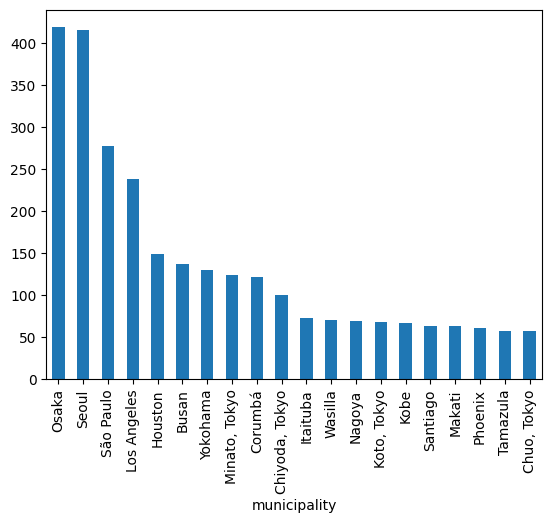

In [29]:
data.groupby('municipality')['municipality'].count().sort_values(ascending=False).head(20).plot.bar()
plt.show()

In [30]:
data.sort_values(by='Airport_type',inplace=True)

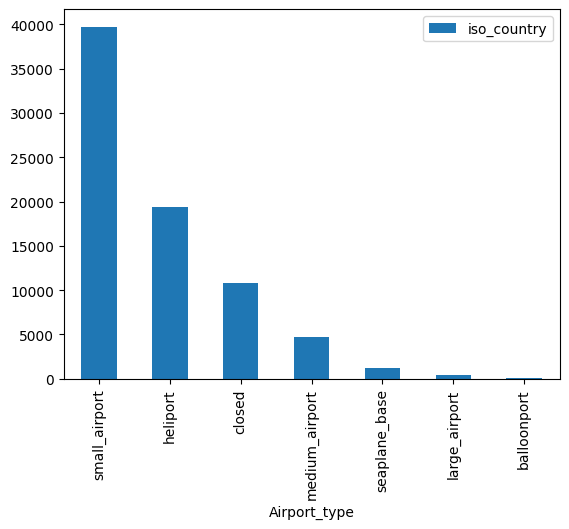

In [31]:
data.groupby('Airport_type')['iso_country'].count().sort_values(ascending=False).head(20).plot.bar()
plt.legend()
plt.show()

In [32]:
from plotly.express import scatter_geo
scatter_geo(data_frame=df[df['Airport_type'] != 'closed'].sample(25000), lat='latitude_deg', lon='longitude_deg', color='Airport_type', hover_name='name')

In [33]:
data

,ident,name,continent,iso_country,iso_region,municipality,scheduled_service,gps_code,iata_code,local_code
Airport_type,,,,,,,,,,
balloonport,5KS0,Anthony Balloonport,NaN,US,US-KS,Anthony,no,5KS0,NaN,5KS0
balloonport,US-2465,Marfa TARS Site,NaN,US,US-TX,Shafter,no,NaN,NaN,NaN
balloonport,US-2464,Yuma TARS Site,NaN,US,US-AZ,Yuma,no,NaN,NaN,NaN
balloonport,TW-0060,Skyrainbow Balloonport,AS,TW,TW-TTT,Luye,no,NaN,NaN,NaN
balloonport,VA60,Flying Horse Farm Balloonport,NaN,US,US-VA,Unison,no,VA60,NaN,VA60
...,...,...,...,...,...,...,...,...,...,...
small_airport,MX-0650,Alicitos de Olivas Airstrip,NaN,MX,MX-CHH,Guadalupe y Calvo,no,NaN,NaN,AAT
small_airport,BR-0747,Fazenda Estrela Airport,SA,BR,BR-PI,Baixa Grande do Ribeiro,no,SWGD,NaN,PI0050
small_airport,BR-0745,Fazenda Canaã Airport,SA,BR,BR-BA,Formosa do Rio Preto,no,SWCR,NaN,BA0249


In [34]:
def impute_nan(df,variable,mean):
    df[variable+"_mean"]= df[variable].fillna(mean)

In [35]:
mean = df.elevation_ft.mean()
mean

1302.9899465861963

In [36]:
impute_nan(df,'elevation_ft',mean)
df.head()

,ident,Airport_type,name,latitude_deg,longitude_deg,elevation_ft,continent,iso_country,iso_region,municipality,scheduled_service,gps_code,iata_code,local_code,home_link,wikipedia_link,keywords,elevation_ft_mean
id,,,,,,,,,,,,,,,,,,
6523,00A,heliport,Total RF Heliport,40.070985,-74.933689,11.0,NaN,US,US-PA,Bensalem,no,K00A,NaN,00A,https://www.penndot.pa.gov/TravelInPA/airports...,NaN,NaN,11.0
323361,00AA,small_airport,Aero B Ranch Airport,38.704022,-101.473911,3435.0,NaN,US,US-KS,Leoti,no,00AA,NaN,00AA,NaN,NaN,NaN,3435.0
6524,00AK,small_airport,Lowell Field,59.947733,-151.692524,450.0,NaN,US,US-AK,Anchor Point,no,00AK,NaN,00AK,NaN,NaN,NaN,450.0
6525,00AL,small_airport,Epps Airpark,34.864799,-86.770302,820.0,NaN,US,US-AL,Harvest,no,00AL,NaN,00AL,NaN,NaN,NaN,820.0
506791,00AN,small_airport,Katmai Lodge Airport,59.093287,-156.456699,80.0,NaN,US,US-AK,King Salmon,no,00AN,NaN,00AN,NaN,NaN,NaN,80.0


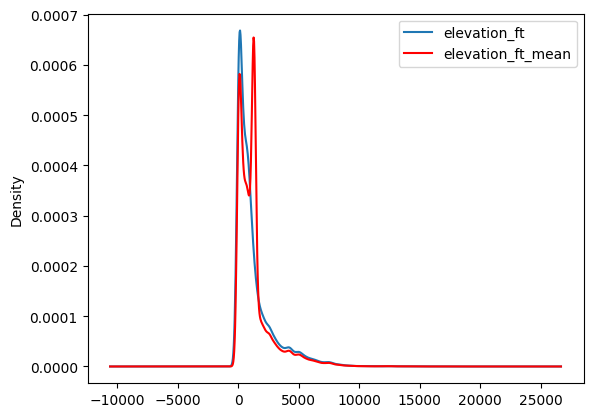

In [37]:
fig = plt.figure()
ax = fig.add_subplot(111)
df['elevation_ft'].plot(kind='kde',ax=ax)
df.elevation_ft_mean.plot(kind='kde',ax=ax,color='red')
lines,labels = ax.get_legend_handles_labels()
plt.legend()

In [38]:
print(df['elevation_ft'].std())
print(df['elevation_ft_mean'].std())

1672.2167766609716
1506.351396677351


In [39]:
def impute_nan(df,variable,median):
    df[variable+"_median"]= df[variable].fillna(median)

In [40]:
median = df.elevation_ft.median()
median

730.0

In [41]:
impute_nan(df,'elevation_ft',median)
df.head()

,ident,Airport_type,name,latitude_deg,longitude_deg,elevation_ft,continent,iso_country,iso_region,municipality,scheduled_service,gps_code,iata_code,local_code,home_link,wikipedia_link,keywords,elevation_ft_mean,elevation_ft_median
id,,,,,,,,,,,,,,,,,,,
6523,00A,heliport,Total RF Heliport,40.070985,-74.933689,11.0,NaN,US,US-PA,Bensalem,no,K00A,NaN,00A,https://www.penndot.pa.gov/TravelInPA/airports...,NaN,NaN,11.0,11.0
323361,00AA,small_airport,Aero B Ranch Airport,38.704022,-101.473911,3435.0,NaN,US,US-KS,Leoti,no,00AA,NaN,00AA,NaN,NaN,NaN,3435.0,3435.0
6524,00AK,small_airport,Lowell Field,59.947733,-151.692524,450.0,NaN,US,US-AK,Anchor Point,no,00AK,NaN,00AK,NaN,NaN,NaN,450.0,450.0
6525,00AL,small_airport,Epps Airpark,34.864799,-86.770302,820.0,NaN,US,US-AL,Harvest,no,00AL,NaN,00AL,NaN,NaN,NaN,820.0,820.0
506791,00AN,small_airport,Katmai Lodge Airport,59.093287,-156.456699,80.0,NaN,US,US-AK,King Salmon,no,00AN,NaN,00AN,NaN,NaN,NaN,80.0,80.0


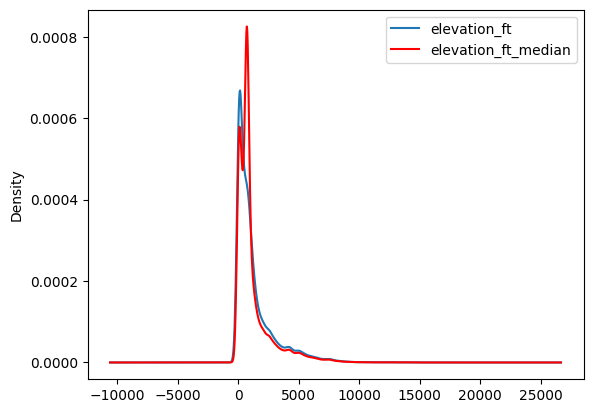

In [42]:
fig = plt.figure()
ax = fig.add_subplot(111)
df['elevation_ft'].plot(kind='kde',ax=ax)
df.elevation_ft_median.plot(kind='kde',ax=ax,color='red')
lines,labels = ax.get_legend_handles_labels()
plt.legend()

In [43]:
print(df['elevation_ft'].std())
print(df['elevation_ft_median'].std())

1672.2167766609716
1522.9329361614273


In [44]:
df['elevation_ft'].dropna().sample()


id
2154    200.0
Name: elevation_ft, dtype: float64

In [45]:
df['elevation_ft'].isnull().sum()

14398

In [46]:
df['elevation_ft'].dropna().sample(df['elevation_ft'].isnull().sum(),random_state=0) # replacing NAN values with random numbers

id
346285     203.0
506570    1558.0
335749     338.0
37433      312.0
511325     249.0
           ...  
7300        34.0
37574     1083.0
20086     1193.0
356078    1012.0
39959     1550.0
Name: elevation_ft, Length: 14398, dtype: float64

In [47]:
def impute_nan(df,variable,median):
    df[variable+"_median"] = df[variable].fillna(median)
    df[variable+"_random"] = df[variable]
    ## it will have the random sample to fill the na
    random_sample = df[variable].dropna().sample(df['elevation_ft'].isnull().sum(),random_state=0)
    ##pandas need to have same index in order to merge the dataset
    random_sample.index = df[df[variable].isnull()].index
    df.loc[df[variable].isnull(),variable+'_random'] = random_sample

In [48]:
median = df.elevation_ft.median()
median

730.0

In [49]:
impute_nan(df,'elevation_ft',median)

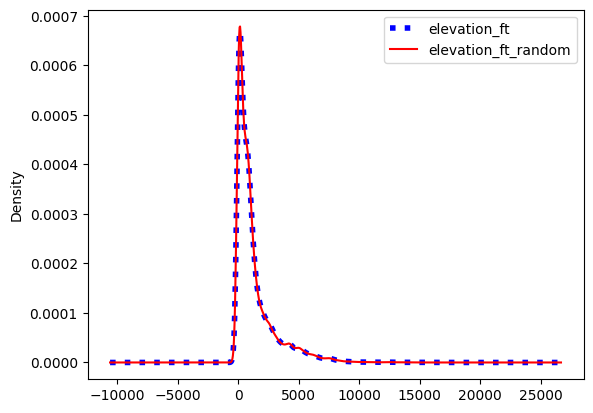

In [50]:
fig = plt.figure()
ax = fig.add_subplot(111)
df['elevation_ft'].plot(kind='kde',ax=ax,color='b',linewidth=4,linestyle=':')
#df.elevation_ft_median.plot(kind='kde',ax=ax,color='red')
df.elevation_ft_random.plot(kind='kde',ax=ax,color='red')
lines,labels = ax.get_legend_handles_labels()
plt.legend()

In [51]:
df.isna().sum()

ident                      0
Airport_type               0
name                       0
latitude_deg               0
longitude_deg              0
elevation_ft           14398
continent              36995
iso_country              259
iso_region                 0
municipality            5050
scheduled_service          0
gps_code               35022
iata_code              67478
local_code             43575
home_link              72673
wikipedia_link         65332
keywords               59329
elevation_ft_mean          0
elevation_ft_median        0
elevation_ft_random        0
dtype: int64

<Axes: >

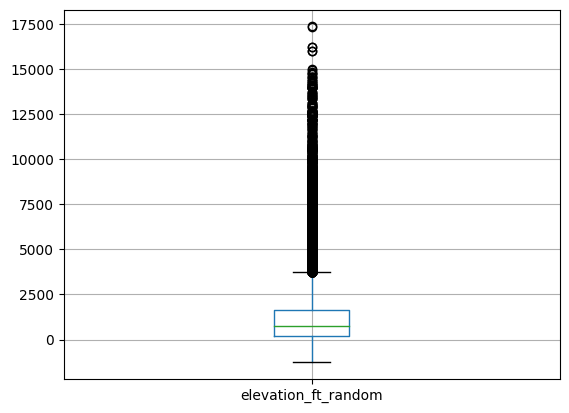

In [52]:
df.boxplot(column='elevation_ft_random')

/tmp/ipykernel_20/2416598897.py:1: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




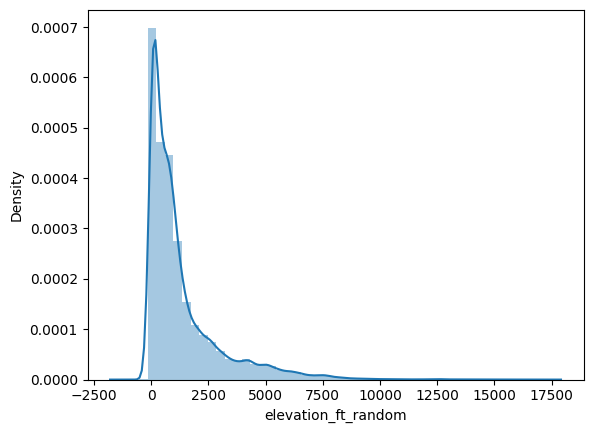

In [53]:
sns.distplot(df['elevation_ft_random'].dropna())
plt.show()

In [54]:
df['elevation_ft_random'].describe()

count    76367.000000
mean      1307.880393
std       1686.787747
min      -1266.000000
25%        206.000000
50%        730.000000
75%       1617.000000
max      17372.000000
Name: elevation_ft_random, dtype: float64

In [55]:
### Lets compute the Interquantile range to calculate the boundries
IQR = df.elevation_ft_random.quantile(0.75)-df.elevation_ft_random.quantile(0.25) 
IQR

1411.0

In [56]:
upper_boundary = df['elevation_ft_random'].mean() + 3* df['elevation_ft_random'].std()
lower_boundary = df['elevation_ft_random'].mean() - 3* df['elevation_ft_random'].std()
print('Lower Boundary : ',lower_boundary),print('Upper Boundary : ',upper_boundary),print('Mean :',df['elevation_ft'].mean())

Lower Boundary :  -3752.482849013116
Upper Boundary :  6368.243635740367
Mean : 1302.9899465861963


(None, None, None)

In [57]:
lower_bridge = df['elevation_ft_random'].quantile(0.25) - (IQR*1.5)
upper_bridge = df['elevation_ft_random'].quantile(0.75) + (IQR*1.5)
print('Lower Bridge : ',lower_bridge),print('Upper Bridge : ',upper_bridge)

Lower Bridge :  -1910.5
Upper Bridge :  3733.5


(None, None)

In [58]:
# Extreme outliers

lower_bridge = df['elevation_ft_random'].quantile(0.25) - (IQR*3)
upper_bridge = df['elevation_ft_random'].quantile(0.75) + (IQR*3)
print(lower_bridge),print(upper_bridge)

-4027.0
5850.0


(None, None)

In [59]:
data = df.copy()

In [60]:
data.loc[data['elevation_ft_random']>5850].shape

(2313, 20)

In [61]:
data.loc[data['elevation_ft_random']>5850,'elevation_ft_random'] = 5850

<Axes: >

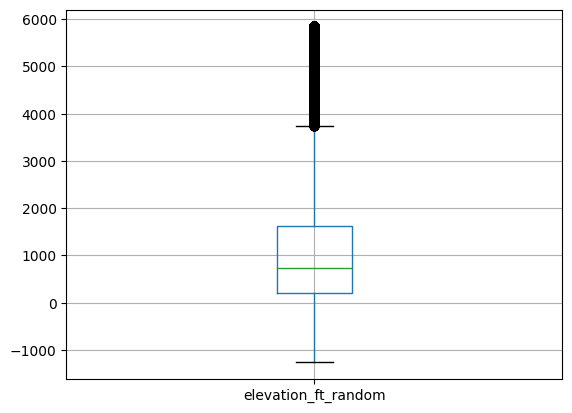

In [62]:
data.boxplot(column='elevation_ft_random')

/tmp/ipykernel_20/1511589236.py:1: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




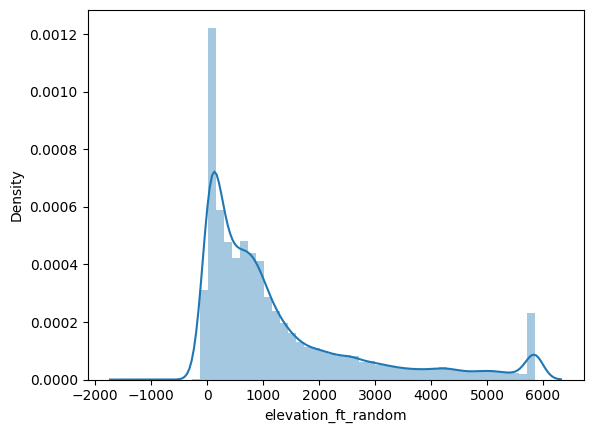

In [63]:
sns.distplot(data['elevation_ft_random'])
plt.show()

Text(0, 0.5, 'Height')

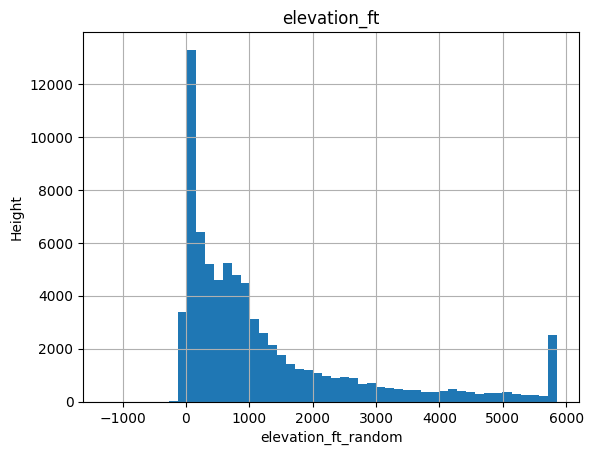

In [64]:
figure = data.elevation_ft_random.hist(bins=50)
figure.set_title('elevation_ft')
figure.set_xlabel('elevation_ft_random')
figure.set_ylabel('Height')

In [65]:
#categorical features
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']

#print columns
print('We have {} categorical features : {}'.format(len(categorical_features),categorical_features))

We have 14 categorical features : ['ident', 'Airport_type', 'name', 'continent', 'iso_country', 'iso_region', 'municipality', 'scheduled_service', 'gps_code', 'iata_code', 'local_code', 'home_link', 'wikipedia_link', 'keywords']


In [66]:
df[categorical_features].isna().sum().sort_values(ascending=False)


home_link            72673
iata_code            67478
wikipedia_link       65332
keywords             59329
local_code           43575
continent            36995
gps_code             35022
municipality          5050
iso_country            259
ident                    0
Airport_type             0
name                     0
iso_region               0
scheduled_service        0
dtype: int64

In [67]:
df['iso_country'].value_counts().head(60)

iso_country
US    30581
BR     6844
JP     3430
CA     3073
AU     2576
MX     2288
RU     1551
KR     1400
GB     1398
DE     1037
FR     1001
AR      941
IT      867
CO      728
PH      697
CN      693
ZA      645
PG      613
IN      612
VE      601
ID      579
ES      509
CL      505
KE      375
PL      337
TR      313
CD      302
CZ      300
NZ      281
IR      276
NO      259
UA      252
SE      251
AE      250
PT      230
TZ      210
BO      202
PE      197
PK      184
UZ      180
KZ      178
NL      176
BE      174
SA      160
HN      159
BG      156
ZW      155
AT      151
CU      150
EC      144
DK      135
MY      134
BW      134
CR      134
GR      132
HU      131
ZM      125
EG      124
FI      120
AO      118
Name: count, dtype: int64

In [68]:
## to be continued